# 2. Photometric Redshifts of galaxies (Part II): KNN

In [2]:
#     Include all required python-related packages     ##
import pandas as pd #dataframes
import numpy as np #deal with arrays
import matplotlib.pyplot as plt #plotting
import seaborn as sns #Statistical visualization
from astropy.table import Table #Read tables
#to show plots in line
%matplotlib inline 
sns.set(style="white") #Features of seaborn
from matplotlib import rcParams
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15
rcParams['axes.labelsize'] = 15


#PCA for data
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Set the directory where the tables are for convenience.
directory="/Users/guadalupecanasherrera/DDM2017_FinalProject/FinalProject/Q2/Tables/"

### Reading and preparing data (same cell as in the Q2_linear)

In [4]:
#Read tables using astropy and transforming them to pandas. 
A=Table.read(directory+"PhotoZFileA.vot").to_pandas()
B=Table.read(directory+"PhotoZFileB.vot").to_pandas()
#I save in panda dataframe structures magnitudes for the colors:
#Table A
A['mag_g']    = A['mag_r'].values + A["g-r"].values
A['mag_u']    = A['mag_g'].values + A["u-g"].values
A['mag_i']    = A['mag_r'].values - A["r-i"].values
A['mag_z']    = A['mag_i'].values - A["i-z"].values
#Table B
B['mag_g']    = B['mag_r'].values + B["g-r"].values
B['mag_u']    = B['mag_g'].values + B["u-g"].values
B['mag_i']    = B['mag_r'].values - B["r-i"].values
B['mag_z']    = B['mag_i'].values - B["i-z"].values
#Save in variables for fitting required by sklearn
#Training data
X = np.vstack((A['mag_r'].values, A['mag_g'].values, A['mag_u'].values, A['mag_i'].values, A['mag_z'].values,
               A['z_spec'].values)).T
M = np.vstack((A['mag_r'].values, A['mag_g'].values, A['mag_u'].values, A['mag_i'].values, A['mag_z'].values)).T
Zspec=A['z_spec'].values
#Testing data
M_test = np.vstack((B['mag_r'].values, B['mag_g'].values, B['mag_u'].values, B['mag_i'].values, B['mag_z'].values)).T
Zspec_test=B['z_spec'].values

In [4]:
#Making PCA: doesn't give any improvement as in LinearMethods...
pca = PCA(whiten=False, n_components=5)
scl = StandardScaler()
Xs = scl.fit_transform(M)
pca.fit(Xs)
#pca.fit(M_color)
pcs=pca.transform(Xs)
pcsb=pca.inverse_transform(pcs)
#pcs.shape
Xsb = scl.fit_transform(M_test)
pcsb=pca.transform(Xsb)

### Evaluating with KNN: search of changes on the training and generalization error as a function of the number of neighbours.

In [5]:
from sklearn.neighbors import KNeighborsRegressor

#preparing variables for the loop to see how E(theta) depends on the number of neighbours
number_n=np.arange(1, 100, 3)
E_theta=[]
E_theta_g=[]

#Model with PCA is worse...

for element in number_n:
    #print element
    neigh = KNeighborsRegressor(n_neighbors=element)
    neigh.fit(pcs, Zspec) 
    Result=(neigh.predict(pcs))
    E_theta.append(np.median(np.abs((Zspec-Result)/(1 + Zspec))))
    Resultb=(neigh.predict(pcsb))
    E_theta_g.append(np.median(np.abs((Zspec_test-Resultb)/(1 + Zspec_test))))

Minimum value of E(theta)_t = 0.0104316356375 for neighbour = 1

Minimum value of E(theta)_g = 0.0127625367572 for neighbour = 7



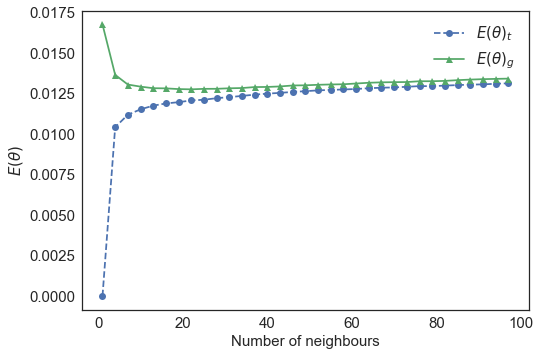

In [6]:
ax = plt.subplot()
ax.plot(number_n, E_theta, linestyle='dashed', marker='o', label=r"$E(\theta)_t$")
ax.plot(number_n, E_theta_g, linestyle='solid', marker='^', label=r"$E(\theta)_g$")
ax.legend(fontsize=15)
ax.set_xlabel("Number of neighbours", fontsize=15)
ax.set_ylabel(r"$E(\theta)$", fontsize=15)

print "Minimum value of E(theta)_t = {0} for neighbour = {1}\n".format(min(E_theta[1:]), np.argmin(E_theta[1:])+1)

print "Minimum value of E(theta)_g = {0} for neighbour = {1}\n".format(min(E_theta_g[1:]), np.argmin(E_theta_g[1:])+1)

### Evaluating with KNN: K=3

In [98]:
# Let's choose the number of neighbours = 3
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(pcs, Zspec) 
Result=neigh.predict(pcs)
print "Training Error: {0}".format(np.median(np.abs((Zspec-Result)/(1 + Zspec))))
Resultb=neigh.predict(pcsb)
print "Generalization Error: {0}".format(np.median(np.abs((Zspec_test-Resultb)/(1 + Zspec_test))))

Training Error: 0.00977590912721
Generalization Error: 0.014071212721


(0, 1)

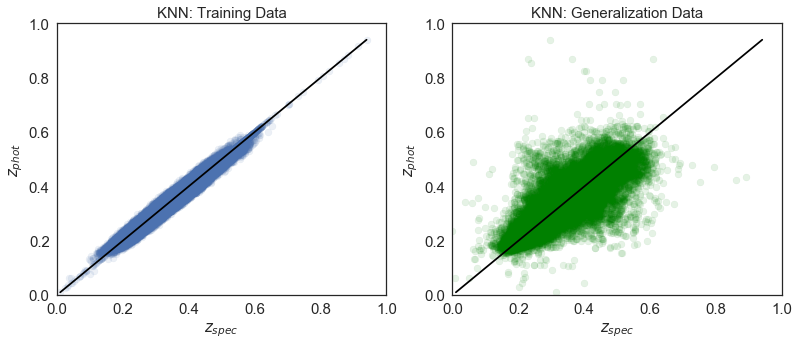

In [103]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(13, 5))
axes[0].scatter(Zspec, Result, alpha=0.1)
axes[0].plot(np.linspace(min(Result), max(Result)), np.linspace(min(Result), max(Result)), 'k')
axes[0].set_xlabel('$z_{spec}$', fontsize=15)
axes[0].set_ylabel(r'$z_{phot}$', fontsize=15)
axes[0].set_title(r'KNN: Training Data', fontsize=15)
axes[0].set_xlim(0, 1)   
axes[0].set_ylim(0, 1)

axes[1].scatter(Zspec_test, Resultb, alpha=0.1, c='g')
axes[1].plot(np.linspace(min(Resultb), max(Resultb)), np.linspace(min(Resultb), max(Result)), 'k')
axes[1].set_xlabel('$z_{spec}$', fontsize=15)
axes[1].set_ylabel(r'$z_{phot}$', fontsize=15)
axes[1].set_title(r'KNN: Generalization Data', fontsize=15)
axes[1].set_xlim(0, 1)   
axes[1].set_ylim(0, 1)
      


Text(0,0.5,u'$Z_{phot}$')

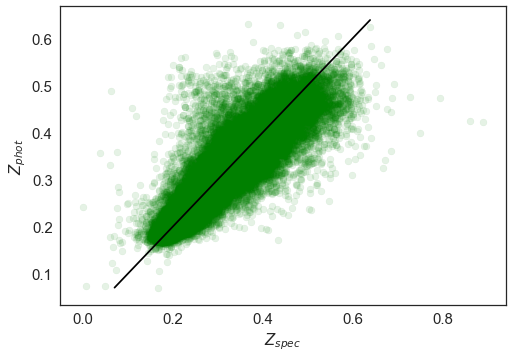

In [45]:
#Plot for testing data
plt.figure()
plt.scatter(Zspec_test, Resultb, alpha=0.1, color="g")
plt.plot(np.linspace(min(Result), max(Result)), np.linspace(min(Result), max(Result)), 'k')
plt.xlabel(r"$Z_{spec}$", fontsize=15)
plt.ylabel(r"$Z_{phot}$", fontsize=15)

### Looking for the best number of neighbours: cross-validation

In [91]:
# I will try cross validation using: https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing #This is needed to find the 

le = preprocessing.LabelEncoder()
le.fit(Zspec)
ZZ=le.transform(Zspec)
cv_scores = []

neighbors=np.arange(1, 30, 1)
for k in neighbors:
    #print k
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, M, ZZ, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

Text(0,0.5,u'Cross-Validation Score')

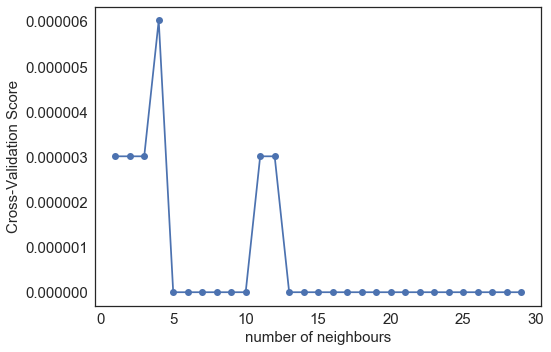

In [94]:
plt.plot(neighbors, cv_scores, 'o-')
plt.xlabel("number of neighbours")
plt.ylabel("Cross-Validation Score")
#It shows that the most efficient number of neighbours is 3... Not very convinced with this.

### Using AdaBoost to reduce the generalization error using KNN

In [100]:
# Adaboost will be used in KNN:

from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(KNeighborsRegressor(n_neighbors=3), n_estimators=20)
ada.fit(pcs, Zspec)
Result = ada.predict(pcs)

print "Training Error: {0}".format(np.median(np.abs((Zspec-Result)/(1 + Zspec))))
Resultb=ada.predict(pcsb)
print "Generalization Error: {0}".format(np.median(np.abs((Zspec_test-Resultb)/(1 + Zspec_test))))


Training Error: 0.00963235852522
Generalization Error: 0.0143503452144


(0, 1)

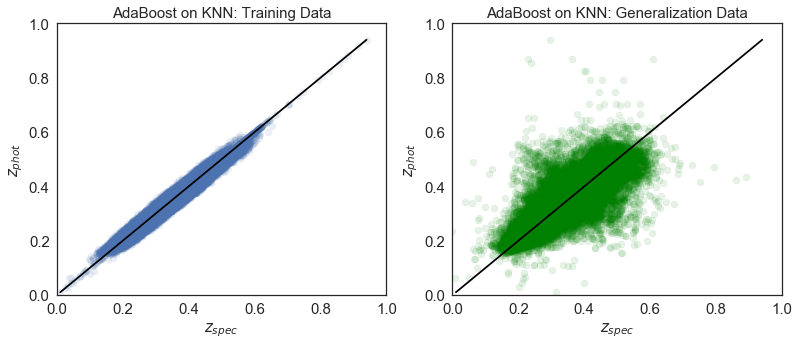

In [104]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(13, 5))
axes[0].scatter(Zspec, Result, alpha=0.1)
axes[0].plot(np.linspace(min(Result), max(Result)), np.linspace(min(Result), max(Result)), 'k')
axes[0].set_xlabel('$z_{spec}$', fontsize=15)
axes[0].set_ylabel(r'$z_{phot}$', fontsize=15)
axes[0].set_title(r'AdaBoost on KNN: Training Data', fontsize=15)
axes[0].set_xlim(0, 1)   
axes[0].set_ylim(0, 1)       

axes[1].scatter(Zspec_test, Resultb, alpha=0.1, c='g')
axes[1].plot(np.linspace(min(Resultb), max(Resultb)), np.linspace(min(Resultb), max(Result)), 'k')
axes[1].set_xlabel('$z_{spec}$', fontsize=15)
axes[1].set_ylabel(r'$z_{phot}$', fontsize=15)
axes[1].set_title(r'AdaBoost on KNN: Generalization Data', fontsize=15)
axes[1].set_xlim(0, 1)   
axes[1].set_ylim(0, 1)

In [66]:
# Another for-loop using AdaBoost as a function of the n_estimators
#preparing variables for the loop to see how E(theta) depends on the number of neighbours
#NEEDED TIME: around 40 min!

number_estimators=np.arange(1, 100, 3)
E_theta=[]
E_theta_g=[]

#Model with PCA is worse...

for element in number_estimators:
    print element
    neigh = AdaBoostRegressor(KNeighborsRegressor(n_neighbors=3), n_estimators=element)
    neigh.fit(pcs, Zspec) 
    Result=(neigh.predict(pcs))
    E_theta.append(np.median(np.abs((Zspec-Result)/(1 + Zspec))))
    Resultb=(neigh.predict(pcsb))
    E_theta_g.append(np.median(np.abs((Zspec_test-Resultb)/(1 + Zspec_test))))  

1
4
7
10
13
16
19
22
25
28
31
34
37
40
43
46
49
52
55
58
61
64
67
70
73
76
79
82
85
88
91
94
97


Minimum value of E(theta)_t = 0.0104316356375 for neighbour = 1

Minimum value of E(theta)_g = 0.0127625367572 for neighbour = 7



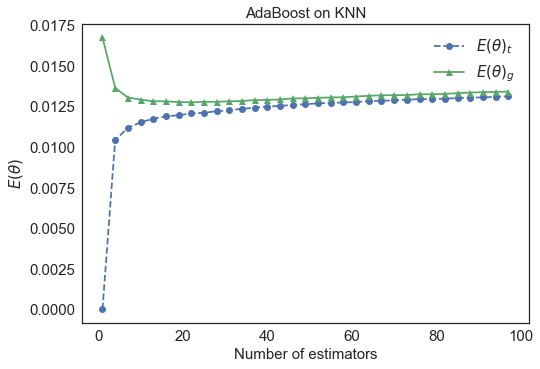

In [102]:
ax = plt.subplot()
ax.plot(number_n, E_theta, linestyle='dashed', marker='o', label=r"$E(\theta)_t$")
ax.plot(number_n, E_theta_g, linestyle='solid', marker='^', label=r"$E(\theta)_g$")
ax.legend(fontsize=15)
ax.set_xlabel("Number of estimators", fontsize=15)
ax.set_ylabel(r"$E(\theta)$", fontsize=15)
ax.set_title(r"AdaBoost on KNN", fontsize=15)

print "Minimum value of E(theta)_t = {0} for neighbour = {1}\n".format(min(E_theta[1:]), np.argmin(E_theta[1:])+1)

print "Minimum value of E(theta)_g = {0} for neighbour = {1}\n".format(min(E_theta_g[1:]), np.argmin(E_theta_g[1:])+1)